In [1]:
from matplotlib.patches import Patch

from google.colab import files
uploaded = files.upload()

Saving gender-specific.xlsx to gender-specific.xlsx
Saving neutral.xlsx to neutral.xlsx


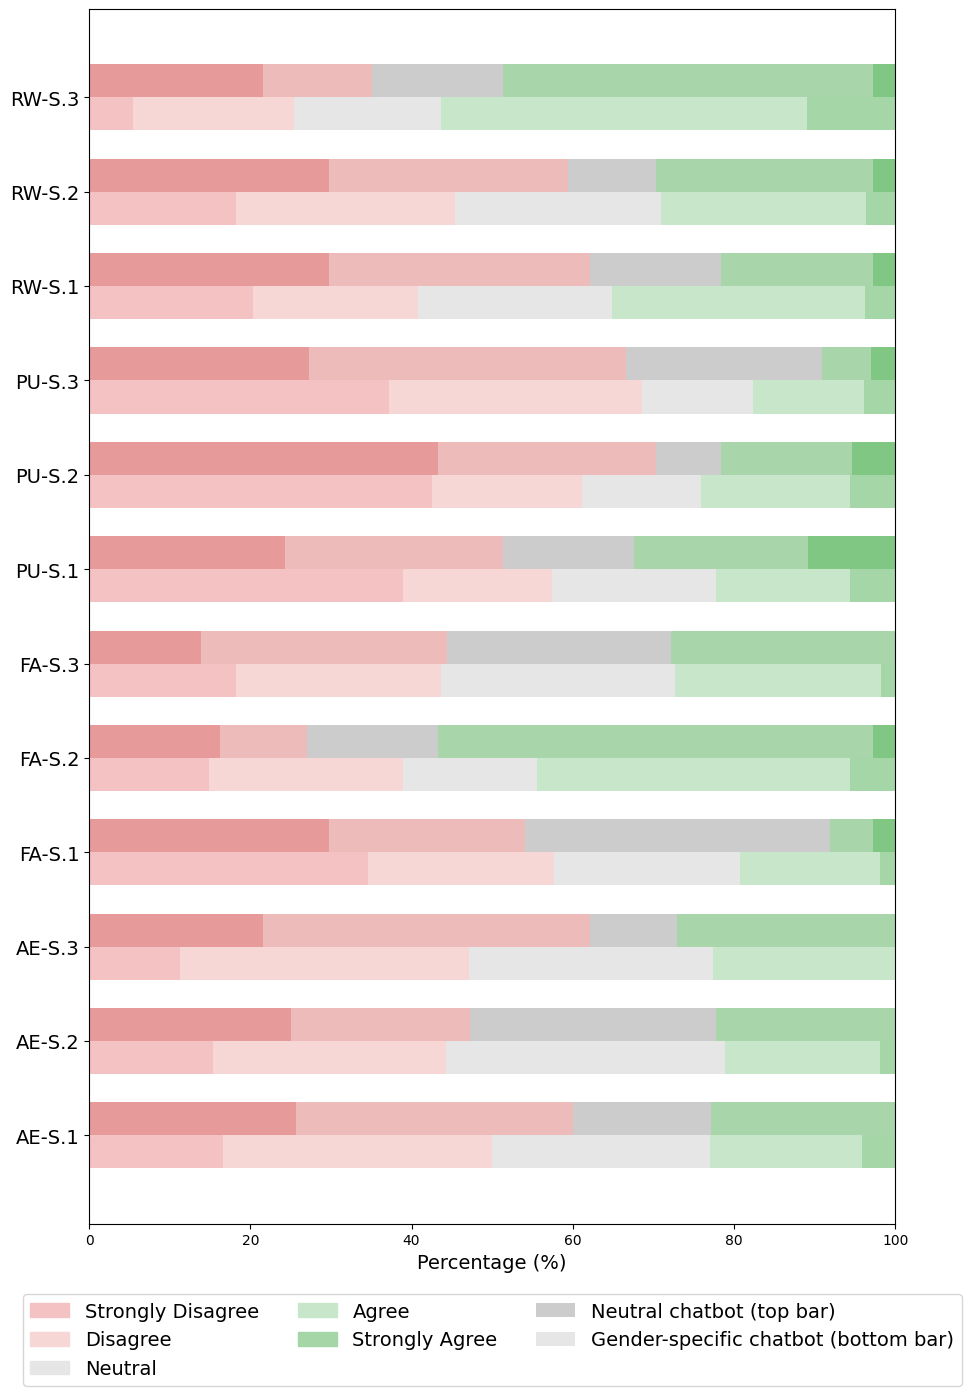

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Upload Excel files:
gs_df = pd.read_excel("gender-specific.xlsx")
n_df = pd.read_excel("neutral.xlsx")

# Add group labels
gs_df["Group"] = "Gender-Specific"
n_df["Group"] = "Neutral"

# Combine datasets
combined_df = pd.concat([gs_df, n_df], ignore_index=True)

melted = pd.melt(
    combined_df,
    id_vars="Group",
    var_name="Item",
    value_name="Response"
)
# Likert scale
response_order = [1, 2, 3, 4, 5]
response_labels = ['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree']

# Colors for the two chatbot groups
gs_colors = ['#f4c2c2', '#f7d6d6', '#e6e6e6', '#c8e6c9', '#a5d6a7']
n_colors = ['#e69a9a', '#eebbbb', '#cccccc', '#a8d5aa', '#81c784']

# Calculate percentages
response_counts = (
    melted[melted['Response'].isin(response_order)]
    .groupby(['Item', 'Group', 'Response'])
    .size()
    .unstack(fill_value=0)
)

response_percentages = response_counts.div(response_counts.sum(axis=1), axis=0) * 100

# Horizontal stacked bars
fig, ax = plt.subplots(figsize=(10, 14))
items = sorted(response_percentages.index.get_level_values(0).unique())
y = np.arange(len(items))
bar_height = 0.35

offsets = {
    'Gender-Specific': -bar_height / 2,
    'Neutral': bar_height / 2
}
bottoms = {group: np.zeros(len(items)) for group in offsets}

for response_val in response_order:
    for i, item in enumerate(items):
        for group in offsets:
            width = response_percentages.loc[(item, group)][response_val] if (item, group) in response_percentages.index else 0
            color = gs_colors[response_val - 1] if group == 'Gender-Specific' else n_colors[response_val - 1]
            ax.barh(
                y[i] + offsets[group],
                width,
                bar_height,
                left=bottoms[group][i],
                color=color,
                label=response_labels[response_val - 1] if (i == 0 and group == 'Gender-Specific') else ""
            )
            bottoms[group][i] += width

# Labels and Legends
ax.set_yticks(y)
ax.set_yticklabels(items, fontsize=14)
ax.set_xlabel("Percentage (%)", fontsize=14)
ax.set_xlim(0, 100)

response_patches = [Patch(color=gs_colors[i], label=response_labels[i]) for i in range(5)]
group_patches = [
    Patch(facecolor=n_colors[2], label='Neutral chatbot (top bar)'),
    Patch(facecolor=gs_colors[2], label='Gender-specific chatbot (bottom bar)')
]

all_handles = response_patches + group_patches

# Place the legend below the chart
ax.legend(
    handles=all_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    frameon=True,
    fontsize= 14
)

plt.tight_layout()
plt.show()
